# Lab 8

In [2]:
"""
Name: Yi Qian Goh
Date: 11/15/2024
Class: CSEN140 Machine Learning and Data Mining
Brief Description: This program performs K-means clustering on a subset of the MNIST dataset (2000 images) to find K clusters
                of digit images. It initializes the centroids M times, iterating through assignments and centroid updates 
                until convergence is reached, tracking the best initialization based on lowest loss (sum of squared distances).
                It outputs the best centroids, the iteration with the lowest loss, and a loss sequence. The program then plots
                the loss over iterations for the best initialization, the final loss values across all initializations, and
                visualizes the best centroids as 28x28 pixel images.
"""

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# given code to fetch MNIST dataset and limiting it to 2000 images
mnist = fetch_openml("mnist_784", version=1)
X_full = mnist["data"]

X = X_full[:2000]
print(X.shape)

(2000, 784)


Best solution at iteration  4
Loss function sequence at iteration  4 :
 [4078884.6987023517, 3240252.176056691, 3197464.6012886837, 3171021.80156998, 3149155.7047878844, 3131052.514544829, 3115115.5654460574, 3105969.691234104, 3101923.675544392, 3100074.509187462, 3098834.772107277, 3097908.432493302, 3097277.700475507, 3096975.601445262, 3096913.8784647984, 3096902.782733345]


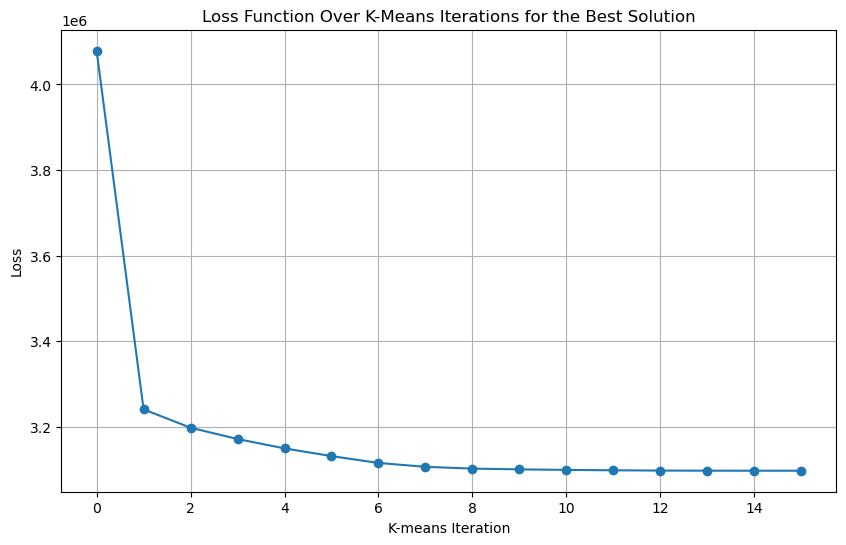

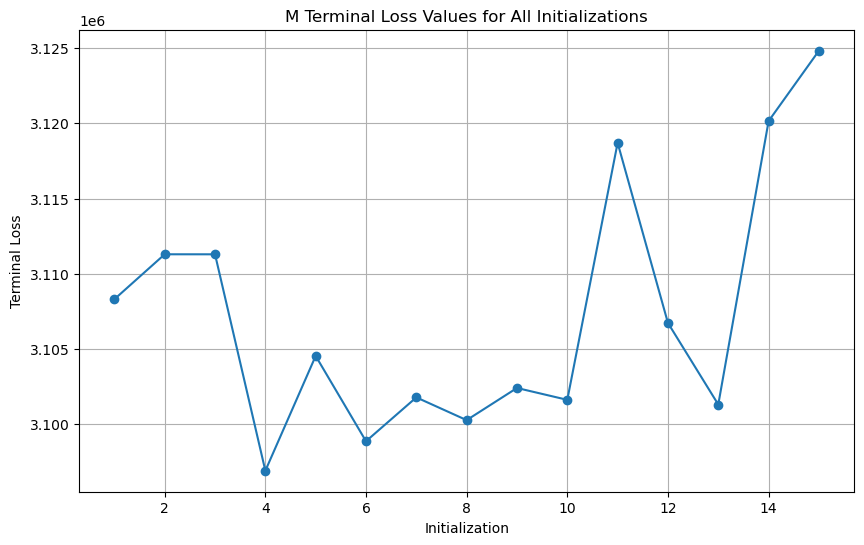

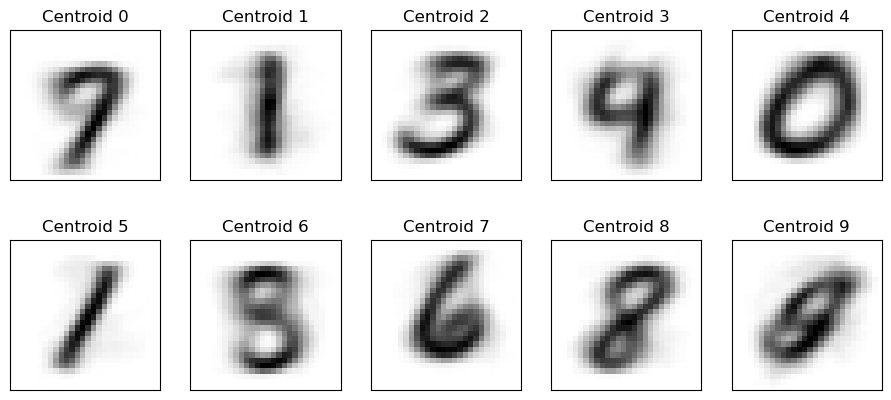

In [9]:
# function to predict data labels by k-means clustering
# data data matrix,  K num of clusters, M num initializations
def my_kmeans(data, K, M): 
    data = np.array(data)
    n_instances = data.shape[0]
    SEED = 10
    rng = np.random.default_rng(SEED)

     # store the best solution across initializations
    best_loss = np.inf
    best_centroids = []
    best_memberships = []
    best_loss_sequence = []
    best_iteration = 0

    M_terminal_losses = []


    # outer most loop that cycles through different centroid initializations
    for m in range(M):
        converged = False

        ### INITIALIZE RANDOM CENTROIDS ###
        indices = rng.integers(low=0, high=n_instances, size=K) # 1D array of k random integers between 0 and n_instances
        #indices = rng.choice(data, size=K, replace=False)
        centroids = data[indices]

        # array to track loss of each cluster
        loss_seq = []

        # 'memberships' is an array of membership of each the instance. The indices indicate instance num
        memberships = np.zeros(n_instances, dtype=int)
        # beginning of calculating k-means loops
        while not converged:
            
            ### ASSIGN CLUSTERS ###
            # loop through all instances to calculate euclidean distance between instances and centroids[k]
            for i in range(n_instances):
                # calculating euclidean distance of instance i to all k centroids
                # 'distances' is an array of the euclidean distance of instance i to all k centroids
                distances = np.sum((data[i] - centroids)**2, axis=1) # axis=0: Sum or compute norm across rows. axis=1: Sum or compute norm across columns. axis=2: Sum or compute norm across the third dimension (depth).
                #distances = np.linalg.norm(data[i]-centroids, axis = 1)
                # assigning membership of instance i to the centroid that has the smallest euclidean distance to the instance
                membership = np.argmin(distances)

                # store the membership of instance i
                memberships[i] = membership
            
            ### RECOMPUTE CENTROIDS ###
            # mean euclidean distance of each cluster to find their new centroids
            new_centroids = np.zeros((K, data.shape[1]))
            sse = 0  # sum of squared error, variable used when computing loss
            for k in range(K):
                # 'cluster_instances' is an array of instances that belong to the same cluster/ have the same membership
                cluster_instances = []
                for n in range(n_instances):
                    if memberships[n] == k:
                        cluster_instances.append(data[n])
                
                # check if any instances are assigned to this cluster
                if len(cluster_instances) > 0:
                    # new centroids calculated as mean of assigned instances
                    new_centroids[k] = np.mean(cluster_instances, axis=0)
                else:
                    new_centroids[k] = centroids[k]

                ### COMPUTE LOSS ###
                # sum of the squared error of each cluster
                for i in cluster_instances:
                    # compute squared distance error between data point and its centroid
                    sse += np.linalg.norm(i - centroids[k])
            loss_seq.append(sse)

            ### CHECK FOR CONVERGENCE (if centroids do not change) ###
            if np.array_equal(centroids, new_centroids):
                converged = True
            
            centroids = new_centroids

        sse_of_converged = sse
        M_terminal_losses.append(sse_of_converged)

        if sse_of_converged < best_loss:
            best_centroids = centroids
            best_memberships = memberships
            best_loss = sse_of_converged
            best_loss_sequence = loss_seq
            best_iteration = m + 1  # plus 1 because I will call m=0 as iteration 1

    return best_centroids, best_memberships, best_loss_sequence, best_iteration, M_terminal_losses

# given function to plot centroids
def plot_centroids(centroids):
    # compute size of plot
    per_row = int(np.ceil(len(centroids)/2))
    _, ax = plt.subplots(2, per_row, figsize = (2.25 * per_row, 5))

    # reshape centroids to be 28 x 28
    centers = centroids.reshape(len(centroids), 28, 28)

    # plot each centroid
    for i, (axi, center) in enumerate(zip(ax.flat, centers)):
        axi.set_title(f'Centroid {i}')
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation="nearest", cmap=plt.cm.binary)
    
    # blank out extra plot if there is an odd number of centroids
    if len(centroids) % 2 == 1:
        ax.flat[-1].set(xticks=[], yticks=[])
        ax.flat[-1].axis("off")

K = 10
M = 15
best_centroids, best_assignments, best_loss_seq, best_iteration, M_terminal_losses = my_kmeans(X, K, M)
print("Best solution at iteration ", best_iteration)
print("Loss function sequence at iteration ", best_iteration, ":\n", best_loss_seq)

# plot the sequence of values of the loss function over k-means iterations for the best solution
plt.figure(figsize=(10, 6))
plt.plot(best_loss_seq, marker='o')
plt.title('Loss Function Over K-Means Iterations for the Best Solution')
plt.xlabel('K-means Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# plot the M terminal loss values for all initializations
plt.figure(figsize=(10, 6))
plt.plot(range(1, M + 1), M_terminal_losses, marker='o')
plt.title('M Terminal Loss Values for All Initializations')
plt.xlabel('Initialization')
plt.ylabel('Terminal Loss')
plt.grid(True)
plt.show()

plot_centroids(best_centroids)